# Week 15, Lecture 02 CodeAlong: Hypothesis Testing

- 06/08/22

Today, we will be analyzing data from the Crowdfunding website Kiva and answering several questions about the data.

- Use your hypothesis testing skills and the  ["Guide: Choosing the Right Hypothesis Test"](https://login.codingdojo.com/m/376/12533/88117) lesson from the LP.
    

- Kiva Crowdfunding Data Set:
    -  https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding 



### Questions to Answer

- Q1: Do all-male teams get more funding vs teams that include at least 1 female?
- Q2: Do different sectors get more/less funding?

# Hypothesis Testing

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [2]:
## load the kiva_loans.csv. display info and head
df = pd.read_csv('../Data/kiva_loans.csv.gz')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666984 entries, 0 to 666983
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  666984 non-null  int64  
 1   funded_amount       666984 non-null  float64
 2   loan_amount         666984 non-null  float64
 3   activity            666984 non-null  object 
 4   sector              666984 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        666976 non-null  object 
 7   country             666984 non-null  object 
 8   region              614405 non-null  object 
 9   currency            666984 non-null  object 
 10  partner_id          653896 non-null  float64
 11  posted_time         666984 non-null  object 
 12  disbursed_time      665003 non-null  object 
 13  funded_time         619335 non-null  object 
 14  term_in_months      666984 non-null  float64
 15  lender_count        666984 non-nul

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [3]:
## Drop null values from related columns
df = df.dropna(subset=['borrower_genders','funded_amount'])

# Setting the id as the index
df = df.set_index('id')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666984 entries, 653051 to 1340339
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       666984 non-null  float64
 1   loan_amount         666984 non-null  float64
 2   activity            666984 non-null  object 
 3   sector              666984 non-null  object 
 4   use                 666973 non-null  object 
 5   country_code        666976 non-null  object 
 6   country             666984 non-null  object 
 7   region              614405 non-null  object 
 8   currency            666984 non-null  object 
 9   partner_id          653896 non-null  float64
 10  posted_time         666984 non-null  object 
 11  disbursed_time      665003 non-null  object 
 12  funded_time         619335 non-null  object 
 13  term_in_months      666984 non-null  float64
 14  lender_count        666984 non-null  int64  
 15  tags                496877 n

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
id,,,,,,,,,,,,,,,,,,,
653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


# Q1:  Do all-male teams get more funding vs teams that include at least 1 female?

## 1. State the Hypothesis & Null Hypothesis 

- $H_0$ (Null Hypothesis): There is no difference between funded amounts for teams with all males vs at least one female. 
- $H_A$ (Alternative Hypothesis):  There is a significant difference between funded amounts for teams with all males vs at least one female. 

## 2. Determine the correct test to perform.
- Numerical Data
- Two groups/samples
- We want to run a 2-sample T-test. 

### Visualize and separate data for hypothesis

- What column is our target?
- What column determines our groups?

In [4]:
## check the col that contains the measurement
df['funded_amount'].describe()

count    666984.000000
mean        785.127844
std        1127.999928
min           0.000000
25%         250.000000
50%         450.000000
75%         900.000000
max      100000.000000
Name: funded_amount, dtype: float64

In [5]:
## check the col that contains info on gender
df['borrower_genders']#.describe()

id
653051             female
653053     female, female
653068             female
653063             female
653084             female
                ...      
1340318            female
1340323            female
1340316            female
1340338            female
1340339            female
Name: borrower_genders, Length: 666984, dtype: object

In [6]:
## create a column that easily separates our groups
df['has_female'] = df['borrower_genders'].str.contains('female')
df['has_female'].value_counts()

True     528461
False    138523
Name: has_female, dtype: int64

In [7]:
## save list of columns needed for each group
needed_cols = ['has_female','funded_amount']

df[needed_cols]

,has_female,funded_amount
id,,
653051,True,300.0
653053,True,575.0
653068,True,150.0
653063,True,200.0
653084,True,400.0
...,...,...
1340318,True,0.0
1340323,True,0.0
1340316,True,25.0


In [8]:
## save male team in separate variable
male_df = df.loc[ df['has_female']==False, needed_cols]
male_df

,has_female,funded_amount
id,,
653418,False,450.0
653170,False,3175.0
653432,False,550.0
1080150,False,125.0
653410,False,1075.0
...,...,...
1339703,False,0.0
1339831,False,50.0
1339701,False,125.0


In [9]:
## save female team in separate variables
female_df = df.loc[ df['has_female']==True, needed_cols]
female_df

,has_female,funded_amount
id,,
653051,True,300.0
653053,True,575.0
653068,True,150.0
653063,True,200.0
653084,True,400.0
...,...,...
1340318,True,0.0
1340323,True,0.0
1340316,True,25.0


In [10]:
## Make a df just for visualization by concat the groups 
plot_df = pd.concat([female_df,male_df])
plot_df

,has_female,funded_amount
id,,
653051,True,300.0
653053,True,575.0
653068,True,150.0
653063,True,200.0
653084,True,400.0
...,...,...
1339703,False,0.0
1339831,False,50.0
1339701,False,125.0


<Axes: xlabel='has_female', ylabel='funded_amount'>

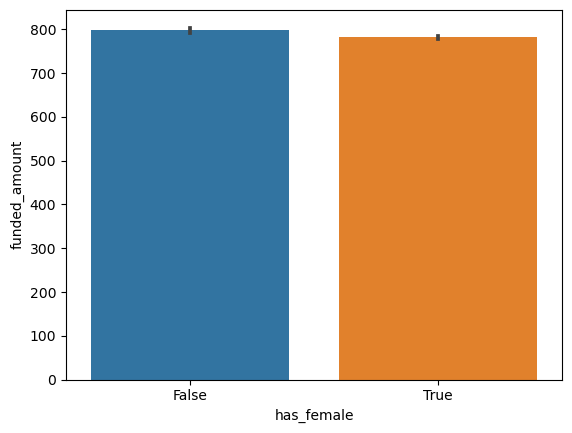

In [11]:
## visualize the group means
sns.barplot(data=plot_df, x='has_female',y='funded_amount')

## 3. Testing Assumptions

- No significant outliers
- Normality
- Equal Variance

### Checking Assumption of No Sig. Outliers

In [12]:
## Saving JUST the numeric col as final group variables
male_group = male_df['funded_amount']
female_group = female_df['funded_amount']
male_group

id
653418      450.0
653170     3175.0
653432      550.0
1080150     125.0
653410     1075.0
            ...  
1339703       0.0
1339831      50.0
1339701     125.0
1339668     175.0
1339743       0.0
Name: funded_amount, Length: 138523, dtype: float64

In [13]:
## Check female group for outliers
female_outliers = np.abs(stats.zscore(female_group)) > 3
female_outliers.sum()

13344

In [14]:
## remove outliers from female_group
female_group = female_group.loc[~female_outliers]
female_group

id
653051     300.0
653053     575.0
653068     150.0
653063     200.0
653084     400.0
           ...  
1340318      0.0
1340323      0.0
1340316     25.0
1340338      0.0
1340339      0.0
Name: funded_amount, Length: 515117, dtype: float64

In [15]:
## Check male group for outliers
male_outliers = np.abs(stats.zscore(male_group)) > 3
male_outliers.sum()

1752

In [16]:
## remove outliers from female_group
male_group = male_group.loc[~male_outliers]
male_group

id
653418      450.0
653170     3175.0
653432      550.0
1080150     125.0
653410     1075.0
            ...  
1339703       0.0
1339831      50.0
1339701     125.0
1339668     175.0
1339743       0.0
Name: funded_amount, Length: 136771, dtype: float64

### Test for Normality

In [17]:
## Check female group for normality
result = stats.normaltest(female_group)
result.pvalue

0.0

In [18]:
## Check n for female group
len(female_group)

515117

In [19]:
## Check male group for normality
result = stats.normaltest(male_group)
result.pvalue

0.0

In [20]:
## Check n for male group
len(male_group)

136771

- We have large enough groups that we can safely disregard the assumption of normality.

### Test for Equal Variances

In [21]:
## Use Levene's test for equal variance
result = stats.levene(male_group, female_group)
print(result)

LeveneResult(statistic=59.19804480808947, pvalue=1.427735962793746e-14)


In [22]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We met the assumption of normality but did NOT meet the assumption of equal variance. 
- We will therefore run a Welch's t-test instead by adding `equal_var=False` to `stats.ttest_ind`

## Final Hypothesis Test - Welch's T-Test

In [23]:
result = stats.ttest_ind(male_group, female_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=29.74961820258417, pvalue=4.102857297759937e-194)


True

In [24]:
male_group.mean()

709.4942275774836

In [25]:
female_group.mean()

652.9337897992107

We had a p-value < .05 for our welch's t-test. We reject the null hypothesis and support the alternative that teams with at least one female receive smaller funded amounts.

# Q2: Do different sectors get more/less funding?

## 1. State the Hypothesis & Null Hypothesis 

- $H_0$ (Null Hypothesis): There is no difference between funded amounts for different sectors.
- $H_A$ (Alternative Hypothesis):  There is a significant difference between funded amounts for different sectors.

## 2. Determine the correct test to perform.

- Numerical Data
- More than two groups/samples
- We want to run an ANOVA test.

In [ ]:
df['sector'].value_counts()

### Visualize and separate data for hypothesis

- What column is our target?
- What column determines our groups?

In [ ]:
ax = sns.barplot(data=df, x='sector', y='funded_amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
needed_cols = ['sector','funded_amount']
df[needed_cols]

In [ ]:
## Create a dictionary with each group as key and funded_amount as values
groups ={}

for sector in df['sector'].unique():
    temp = df.loc[df['sector']== sector, 'funded_amount']
    groups[sector] = temp

groups.keys()

In [ ]:
groups['Personal Use']

## 3. Testing Assumptions

- No significant outliers
- Normality
- Equal Variance

### Checking Assumption of No Sig. Outliers

In [ ]:
## Loop through groups dict
for sector, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {sector} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[sector] = data

### Test for Normality

In [ ]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for sector, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([sector,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

- We failed the assumption of normality, but our groups are large enough that we can safely disregard/ignore the assumption of normality.

### Test for Equal Variances

In [ ]:
## DEMO: using the * operator to unpack lists
a_list = ['a','b','c']
b_list = [1,2,3]

new_list =[*a_list, *b_list]
new_list

In [ ]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

In [ ]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

- We met the assumption of normality but did NOT meet the assumption of equal variance. 
- We wanted to run an ANOVA test but will need to use a Kurskal-Wallis test instead.

## Final Hypothesis Test

In [ ]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

- Our Kruskal Wallis test returned a p-value MUCH less than .05. We reject the null hypothesis and conclude that there is a significant difference between funded amounts for different Sectors. 

- We don't know WHICH sectors are different yet, though.... 
    - For that we will run a Post-Hoc Multiple Comparison Test to get a p-value for every possible combination of 2 groups. 

### Post-Hoc Multiple Comparison Test

In [ ]:
## Post Hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### Testing Converting our Dictionary to a DataFrame

In [ ]:
## slice a test sector
temp = groups['Personal Use']
temp

In [ ]:
## test making a datafrae from the test sector and filling in the sector name
pd.DataFrame({'Funded Amount':temp, 'Sector':'Personal Use'})

#### Preparing the new dataframe for Tukey's test in a looop

In [ ]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for sector, temp in groups.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'Funded Amount':temp, 'Sector':sector})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

In [ ]:
## save the values as kg_lost and the labels to the Diet
values = tukeys_data['Funded Amount']
labels = tukeys_data['Sector']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

In [ ]:
## optional -slicing out dataframe from results
summary = tukeys_results.summary()
tukeys_df = pd.DataFrame(summary.data[1:], columns=summary.data[0])
tukeys_df

In [ ]:
pd.set_option('display.max_rows',120)
tukeys_df

In [ ]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='Sector', y='Funded Amount', ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right');

In [ ]:
## Not significantly different
tukeys_df[tukeys_df['reject'] ==False]

In [ ]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous();

- As we can see, there are MANY sectors that are significantly different from each other. Some highlights include that Wholesame and Entertainment have the highest average funded amounts and Personal use has the lowest.

# APPENDIX

In [ ]:
raise Exception('Stop here!')

## Q1

#### OPTIONAL: visualize cleaned groups

In [ ]:
## combine all of the indices from male_group and female_group into 1 list
combined_ids = [*male_group.index,*female_group.index]
combined_ids[:5]

In [ ]:
## create a clean version of plot_df by only keeping
plot_df = plot_df[plot_df.index.isin(combined_ids)]
plot_df

In [ ]:
sns.barplot(data=plot_df, x='has_female',y='funded_amount')

## Q2

In [ ]:
## concatenate and fix index
plot_df = pd.concat(groups)
plot_df

In [ ]:
## Fix index (only want 'id') (option A)
plot_df = plot_df.reset_index().set_index('id')
plot_df = plot_df.drop(columns='level_0')
plot_df

In [ ]:
## Fix index (only want 'id') (option B)
plot_df = pd.concat(groups)
plot_df = plot_df.droplevel(0)
plot_df

In [ ]:
ax = sns.barplot(data=plot_df, x='sector', y='funded_amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');